## Summary

To apply linear regression technique to the given problem of predicting customer value.

In [1]:
# For logging the time taken for a step.
import time

# For importing functions written by us
import sys
sys.path.append('../../common_routines')

from relevant_functions import (get_train_test_data, 
get_all_predictor_cols, 
get_train_data,
get_test_data,
get_rel_cols)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt

In [2]:
INPUT_DIR = '../../input/'

In [3]:
ts = time.time()
train = get_train_data(INPUT_DIR)
time.time() - ts

6.300232172012329

### A model using all predictors

Let us build a model using all predictors and see how it performs

In [4]:
all_predictor_cols = get_all_predictor_cols(train)

In [5]:
ts = time.time()
X = train[all_predictor_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
time.time() - ts

79.29448223114014

In [6]:
-cross_val_scores.mean()

2984537848025.6016

### Generate plots on data
Since the model performance is abysmal, let us go back to square one and start with some plots.

Text(0.5, 1.0, 'Target values in training data')

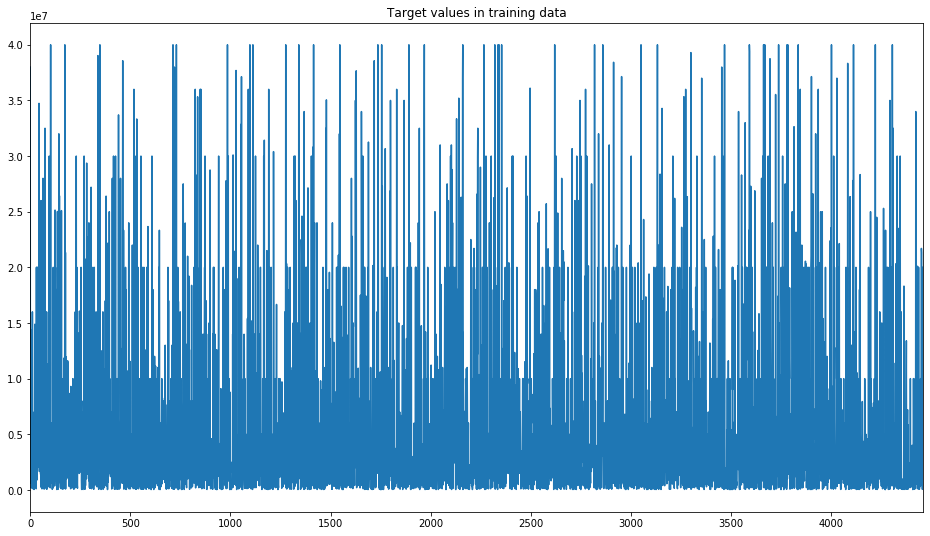

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
train['target'].plot(ax=ax)
ax.set_title('Target values in training data')

Text(0.5, 1.0, 'Logarithm of target values in training data')

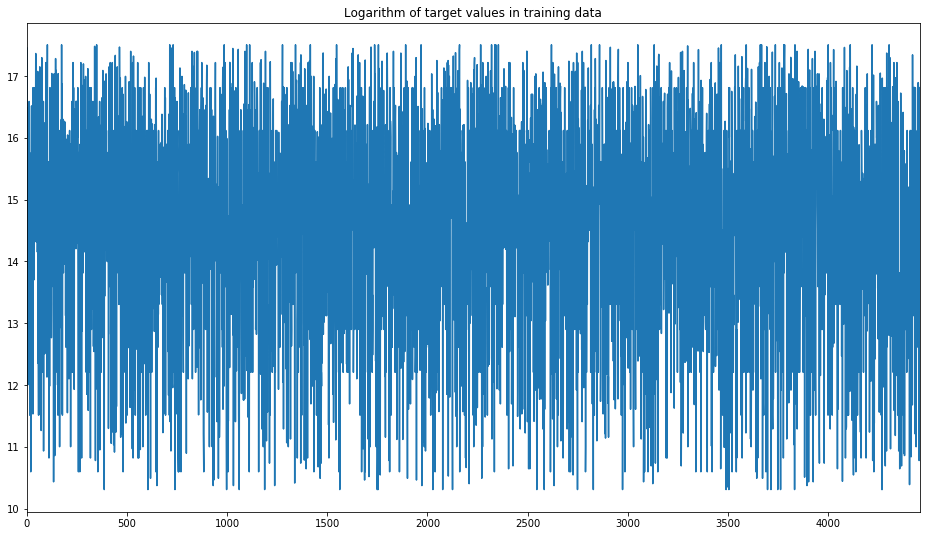

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
train['log_target'].plot(ax=ax)
ax.set_title('Logarithm of target values in training data')

### Choosing dense columns 

Since there is a large number of predictor columns to choose from, let us focus on the most dense of them and proceed forward.

In [43]:
dense_cols = get_rel_cols(30, train)

In [44]:
len(dense_cols)

40

In [45]:
dense_cols

['0ff32eb98',
 'c5a231d81',
 '91f701ba2',
 'c47340d97',
 '0572565c2',
 'adb64ff71',
 'f190486d6',
 '5c6487af1',
 'e176a204a',
 '6619d81fc',
 '70feb1494',
 '23310aa6f',
 '190db8488',
 '1db387535',
 '491b9ee45',
 '66ace2992',
 '9fd594eec',
 'fc99f9426',
 '58e2e02e6',
 '703885424',
 'eeb9cd3aa',
 '1931ccfdd',
 '324921c7b',
 '1702b5bf0',
 'fb0f5dbfe',
 'f74e8f13d',
 '20aa07010',
 '26fc93eb7',
 '58232a6fb',
 '15ace8c9f',
 'fb49e4212',
 '2ec5b290f',
 '62e59a501',
 '963a49cdc',
 '58e056e12',
 '241f0f867',
 '6eef030c1',
 'b43a7cfd5',
 'd6bb78916',
 '024c577b9']

Text(0.5, 1.0, 'Column values in training data')

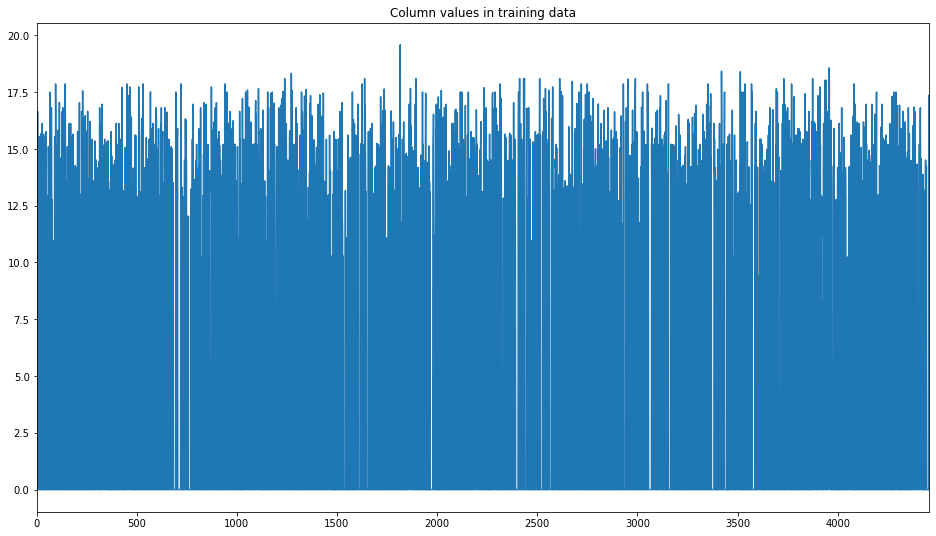

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
np.log(1.0 + train[dense_cols[5]]).plot(ax=ax)
ax.set_title('Column values in training data')

Text(0.5, 1.0, 'Column values in training data')

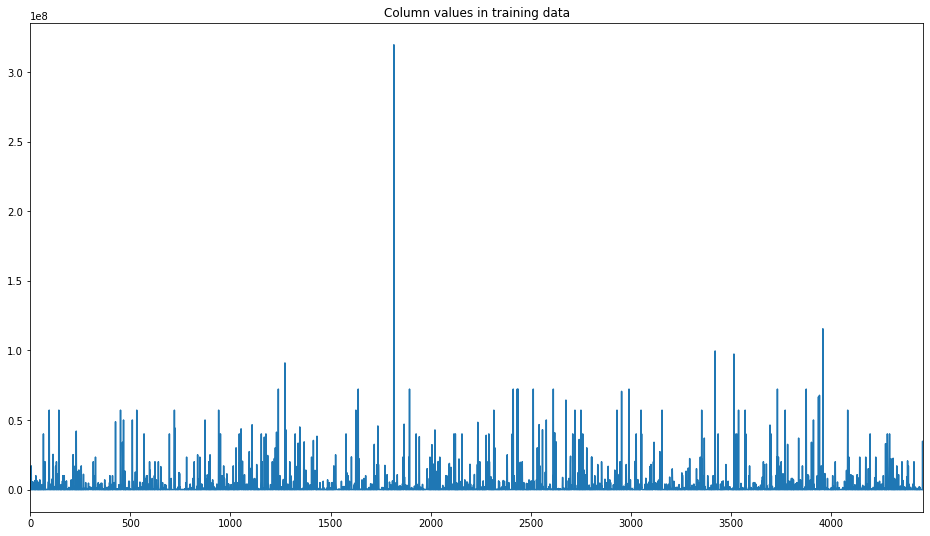

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
train[dense_cols[5]].plot(ax=ax)
ax.set_title('Column values in training data')

In [46]:
train[dense_cols[5]].describe()

count    4.459000e+03
mean     2.595256e+06
std      9.902053e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.500000e+05
max      3.196120e+08
Name: adb64ff71, dtype: float64

### Observed heteroskedasticity

There looks to be a lot of heteroskedasticity in the data and this necessitates a log transform. However, prior to doing that, let us check our model performance on the original untransformed columns (dense ones alone).

In [49]:
ts = time.time()
X = train[dense_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(np.sqrt(-cross_val_scores))
print(np.sqrt(-cross_val_scores.mean()))
time.time() - ts

[1.64934115 1.7060369  1.63715524 1.71152071 1.75677317]
1.6927327341514264


0.03930306434631348

In [50]:
train_new = train.copy()

In [51]:
for col in all_predictor_cols:
    train_new['log_' + col] = np.log(train_new[col] + 1.0)

In [52]:
log_dense_cols = ['log_' + col for col in dense_cols]

In [53]:
ts = time.time()
X = train_new[log_dense_cols]
Y = train_new['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(np.sqrt(-cross_val_scores))
print(np.sqrt(-cross_val_scores.mean()))
time.time() - ts

[1.7015354  1.77205146 1.72479277 1.72851795 1.82778352]
1.7515059880443475


0.2630290985107422

### Drilling down.

Let us try reducing the dimensionality of the model and see if it helps.

In [54]:
dense_cols = get_rel_cols(34, train)

In [55]:
len(dense_cols)

18

In [56]:
dense_cols

['0ff32eb98',
 'c5a231d81',
 '91f701ba2',
 'c47340d97',
 '0572565c2',
 'adb64ff71',
 'f190486d6',
 '5c6487af1',
 'e176a204a',
 '6619d81fc',
 '70feb1494',
 '23310aa6f',
 '190db8488',
 '1db387535',
 '491b9ee45',
 '66ace2992',
 '9fd594eec',
 'fc99f9426']

In [57]:
ts = time.time()
X = train[dense_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(np.sqrt(-cross_val_scores))
print(np.sqrt(-cross_val_scores.mean()))
time.time() - ts

[1.66181484 1.70754993 1.64578725 1.73920878 1.76635358]
1.7047476732254327


0.032206058502197266

In [36]:
ts = time.time()
X = train_new[['log_' + col for col in dense_cols]]
Y = train_new['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(np.sqrt(-cross_val_scores))
print(np.sqrt(-cross_val_scores.mean()))
time.time() - ts

[1.70261785 1.76559871 1.72201788 1.72451058 1.83018422]
1.7495772592381496


0.03300118446350098

### Not much progress

It does not look like we are getting much benefit here. Hence, let us try increasing the number of predictors.

In [39]:
dense_cols = get_rel_cols(10, train)

In [40]:
len(dense_cols)

376

In [41]:
ts = time.time()
X = train[dense_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(np.sqrt(-cross_val_scores))
print(np.sqrt(-cross_val_scores.mean()))
time.time() - ts

[1.72760858 1.77151609 1.78070513 1.82315754 1.81435965]
1.7837945950537402


0.3125131130218506

In [42]:
ts = time.time()
X = train_new[['log_' + col for col in dense_cols]]
Y = train_new['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(np.sqrt(-cross_val_scores))
print(np.sqrt(-cross_val_scores.mean()))
time.time() - ts

[1.74571391 1.8369101  1.79505564 1.80131824 1.84938919]
1.8060436462661846


0.2859048843383789

### Conclusion

We look to be plateauing at around 1.69 and there does not look to be much of a benefit in moving forward. Hence we conclude our analysis here and proceed with the generation of predictions for the test set.

In [29]:
# Let us train the best model over the entire data set.
dense_cols = get_rel_cols(34, train)
X = train[dense_cols]
Y = train['log_target']
my_model = LinearRegression().fit(X, Y)

In [30]:
# Generate predictions on test data
ts = time.time()
test = get_test_data(INPUT_DIR)
test_X = test[dense_cols]
test_predictions = my_model.predict(test_X)

# Make sure  that the predictions are made non negative.
test_predictions[test_predictions < 0] = 0
test['log_target'] = test_predictions
test['target'] = np.exp(test['log_target']) - 1
time.time() - ts

71.2836537361145

In [31]:
test['log_target'].describe()

count    49342.000000
mean        14.394306
std          0.360164
min          0.000000
25%         14.283464
50%         14.283464
75%         14.337655
max         25.083522
Name: log_target, dtype: float64

In [32]:
test[['ID', 'target']].to_csv('submission_linear_regression.csv', index=False)